In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score   # model accuracy
from sklearn.metrics import confusion_matrix # how many records correctly classified
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv("titanic_eda/train.csv")
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
dataset["Sex"] = le.fit_transform(dataset["Sex"])

In [5]:
dataset["Embarked"] = le.fit_transform(dataset["Embarked"].astype(str))

In [6]:
dataset["Age"] = np.where(dataset["Age"].isnull(),28,dataset["Age"])

In [7]:
X = dataset.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [8]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [9]:
lstColumnNames = list(["Pclass","Sex","SibSp","Parch","Embarked"])

In [10]:
def FindConfusionMatrix(Xdataset, sColumnName):
    y = Xdataset[sColumnName]
    Xdataset = Xdataset.drop([sColumnName],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(Xdataset,y,test_size=0.3,random_state=0) # 70% training dataset and 30% test datatset
    clf = BernoulliNB()
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    print("Dependent Variable:", sColumnName)
    print("Accuracy")
    print(accuracy_score(y_test,y_pred,normalize=True), "\n")
    print("Confusion matrix")
    return print(confusion_matrix(y_test,y_pred))
     

In [11]:
def PlotConfusionMatrix(Xdataset, sColumnName):
    y = Xdataset[sColumnName]
    Xdataset = Xdataset.drop([sColumnName],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(Xdataset,y,test_size=0.3,random_state=0) # 70% training dataset and 30% test datatset
    clf = BernoulliNB()
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    print("Dependent Variable:", sColumnName)
    print("Accuracy")
    print(accuracy_score(y_test,y_pred,normalize=True), "\n")
    plot_confusion_matrix(clf,  
                          X_test, 
                          y_test)
    return plt.show()
     

In [12]:
print("Printing confusion matrix\n")
for sColumnName in lstColumnNames:
    FindConfusionMatrix(X,sColumnName)
    print("\n")

Printing confusion matrix

Dependent Variable: Pclass
Accuracy
0.5932835820895522 

Confusion matrix
[[ 33   0  27]
 [ 21   0  31]
 [ 29   1 126]]


Dependent Variable: Sex
Accuracy
0.7835820895522388 

Confusion matrix
[[ 72  27]
 [ 31 138]]


Dependent Variable: SibSp
Accuracy
0.6791044776119403 

Confusion matrix
[[162  19   0   0   0   0]
 [ 45  20   0   0   0   0]
 [  4   3   0   0   0   0]
 [  4   2   0   0   0   0]
 [  4   3   0   0   0   0]
 [  1   1   0   0   0   0]]


Dependent Variable: Parch
Accuracy
0.7425373134328358 

Confusion matrix
[[189  15   0   0   0]
 [ 30  10   0   0   0]
 [ 17   4   0   0   0]
 [  2   0   0   0   0]
 [  1   0   0   0   0]]


Dependent Variable: Embarked
Accuracy
0.6977611940298507 

Confusion matrix
[[  0   0  60]
 [  0   0  21]
 [  0   0 187]]




Plotting confusion matrix

Dependent Variable: Pclass
Accuracy
0.5932835820895522 



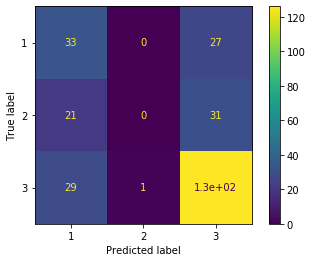

Dependent Variable: Sex
Accuracy
0.7835820895522388 



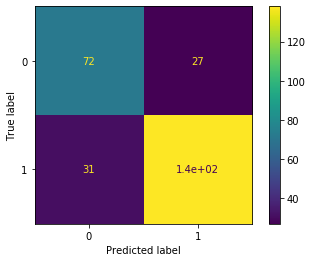

Dependent Variable: SibSp
Accuracy
0.6791044776119403 



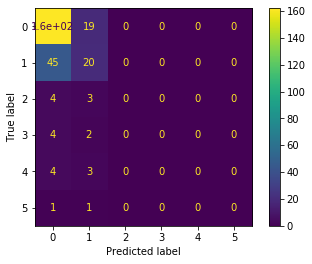

Dependent Variable: Parch
Accuracy
0.7425373134328358 



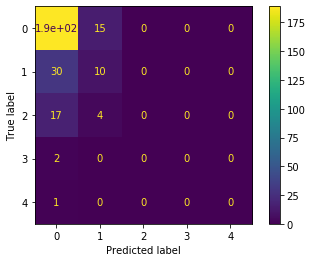

Dependent Variable: Embarked
Accuracy
0.6977611940298507 



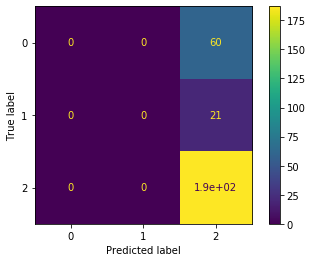

In [13]:
print("Plotting confusion matrix\n")
for sColumnName in lstColumnNames:
    PlotConfusionMatrix(X,sColumnName)